(290L, 27L)
[  9.17199797e-01   8.23797282e-02   3.91390593e-04   1.41926732e-05
   1.16225474e-05   1.34384077e-06   9.48467292e-07   5.42688440e-07
   2.27845587e-07   1.37846354e-07   3.21043309e-08   1.02123170e-08
   9.84989310e-09   5.72990906e-09   3.36518405e-09   2.51236783e-09
   1.68346454e-09   9.22468500e-10   5.54677414e-10   4.51754802e-10
   3.70402713e-10   2.42325338e-10   1.57553154e-10   8.01864587e-11
   1.74327616e-11   5.54769006e-33   5.54769006e-33]


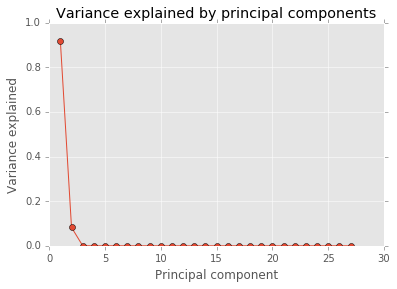

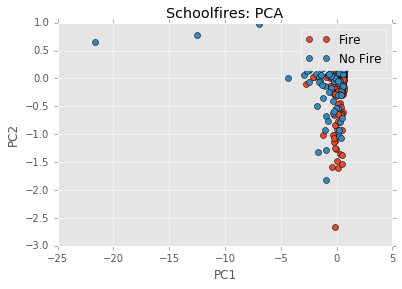

In [35]:
import numpy as np
import pandas as pd
from pylab import *
import scipy.linalg as linalg
from sklearn.decomposition import PCA
#from pivottablejs import pivot_ui
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing 
matplotlib.style.use('ggplot')
%matplotlib inline
def f(x):
    if x > 0:
        return 1
    else:
        return 0
featurelist =['reportedCrimeVandalism','unemploymentChange','medianIncome',
     'refugees','population','reportedCrime', 'Cases']
featureremovelist = ['governing','Unnamed: 0','municipalityTypeBroad','municipalityType',
               'satisfactionInfluence','satisfactionGeneral','satisfactionElderlyCare','name',
              'latitude','longitude','code', 'Municipality', 'Population']
data = pd.read_csv("2013_merge.csv")
#print data
data = data.drop(featureremovelist, axis=1).dropna()
data['Arson'] = data['Cases'].apply(f) 
classLabels = featurelist
#print classLabels
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames,range(6)))
y = np.mat(data['Arson']).T #np.mat([classDict[value] for value in classLabels]).T
#print y
pca = PCA(n_components=6)
X = array(data)

N = len(y)
M = len(featurelist)
C = len(classNames)
print X.shape
Y = (X - np.ones((N,1))*X.mean(0))/X.std()
pca.fit(X)
#pca.fit(Y)
U,S,V = linalg.svd(Y,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 
print rho
figure()
plot(range(1,len(rho)+1),rho,'o-')
title('Variance explained by principal components');
xlabel('Principal component');
ylabel('Variance explained');
show()

V = mat(V).T

# Project the centered data onto principal component space
Z = Y * V


# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = figure()
f.hold()
title('Schoolfires: PCA')
Z = array(Z)
for c in [0,1]:
    # select indices belonging to class c:
    class_mask = y.A.ravel()==c
    plot(Z[class_mask,i], Z[class_mask,j], 'o')
legend(["Fire","No Fire"])
xlabel('PC{0}'.format(i+1))
ylabel('PC{0}'.format(j+1))

# Output result to screen
show()

#data['Cases'].plot()
#plt.show()
#print pd.DataFrame(pca.components_, columns=featurelist)

In [ ]:
firelist = list()
mean_list = list()
sata = data.loc[:1998]
#firelist.append(round(data.where(data['Year'] == i)['Cases'].dropna().var(),2))
firelist.append(data.where(data['Year'] == 2000)['Cases'])
#mean_list.append(round(data.where(data['Year'] == 1998)['Cases'].dropna().mean(),2))
#mean_list
sata 